In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from parse import parse
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree

In [2]:
!curl -O https://datasets.imdbws.com/title.basics.tsv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  5  102M    5 5310k    0     0  8496k      0  0:00:12 --:--:--  0:00:12 8496k
 19  102M   19 20.1M    0     0  12.3M      0  0:00:08  0:00:01  0:00:07 12.3M
 26  102M   26 26.7M    0     0  10.2M      0  0:00:10  0:00:02  0:00:08 10.2M
 33  102M   33 33.7M    0     0  9545k      0  0:00:10  0:00:03  0:00:07 9545k
 39  102M   39 40.5M    0     0  8982k      0  0:00:11  0:00:04  0:00:07 8982k
 46  102M   46 47.4M    0     0  8643k      0  0:00:12  0:00:05  0:00:07 8661k
 53  102M   53 54.1M    0     0  8368k      0  0:00:12  0:00:06  0:00:06 6971k
 59  102M   59 60.9M    0     0  8191k      0  0:00:12  0:00:07  0:00:05 7008k
 66  102M   66 67.7M    0     0  8046k      0  0:00:12  0:00:08  0:00:04 6959k
 72  102M   72 74.4M    0     0  7915k      0  0:00

In [3]:
basics = pd.read_csv("title.basics.tsv.gz" ,compression='gzip', sep='\t', dtype={"genres": str}, na_values = '\\N' )

C:\Users\Usrer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986228 entries, 0 to 5986227
Data columns (total 9 columns):
tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           int64
startYear         float64
endYear           float64
runtimeMinutes    object
genres            object
dtypes: float64(2), int64(1), object(6)
memory usage: 411.0+ MB


In [5]:
basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,NaN,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894.0,NaN,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894.0,NaN,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894.0,NaN,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,NaN,45,Romance
9,tt0000010,short,Exiting the Factory,La sortie de l'usine Lumière à Lyon,0,1895.0,NaN,1,"Documentary,Short"


In [6]:
len(basics)

5986228

In [7]:
temp = basics["genres"].str.get_dummies(",")

In [8]:
temp.head(10)

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
list(temp.columns.values)

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [10]:
len(temp)

5986228

In [11]:
temp2 = pd.get_dummies( basics.titleType )

In [12]:
temp2.head(10)

,movie,short,tvEpisode,tvMiniSeries,tvMovie,tvSeries,tvShort,tvSpecial,video,videoGame
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0


In [13]:
len(temp2)

5986228

In [14]:
df = pd.concat([temp, temp2], axis=1)

In [15]:
# del df['titleType']

In [16]:
# del df['genres']

In [17]:
basics['runtimeMinutes'] = pd.to_numeric(basics['runtimeMinutes'],errors='coerce')

In [18]:
basics.endYear = np.where(pd.isnull(basics.endYear), 0, basics.endYear - basics.startYear)

In [19]:
column_names_to_normalize = ['startYear', 'endYear', 'runtimeMinutes']
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(basics[column_names_to_normalize].values)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = basics.index)
df[column_names_to_normalize] = df_temp

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986228 entries, 0 to 5986227
Data columns (total 41 columns):
Action            int64
Adult             int64
Adventure         int64
Animation         int64
Biography         int64
Comedy            int64
Crime             int64
Documentary       int64
Drama             int64
Family            int64
Fantasy           int64
Film-Noir         int64
Game-Show         int64
History           int64
Horror            int64
Music             int64
Musical           int64
Mystery           int64
News              int64
Reality-TV        int64
Romance           int64
Sci-Fi            int64
Short             int64
Sport             int64
Talk-Show         int64
Thriller          int64
War               int64
Western           int64
movie             uint8
short             uint8
tvEpisode         uint8
tvMiniSeries      uint8
tvMovie           uint8
tvSeries          uint8
tvShort           uint8
tvSpecial         uint8
video             uint8

In [21]:
len(df)

5986228

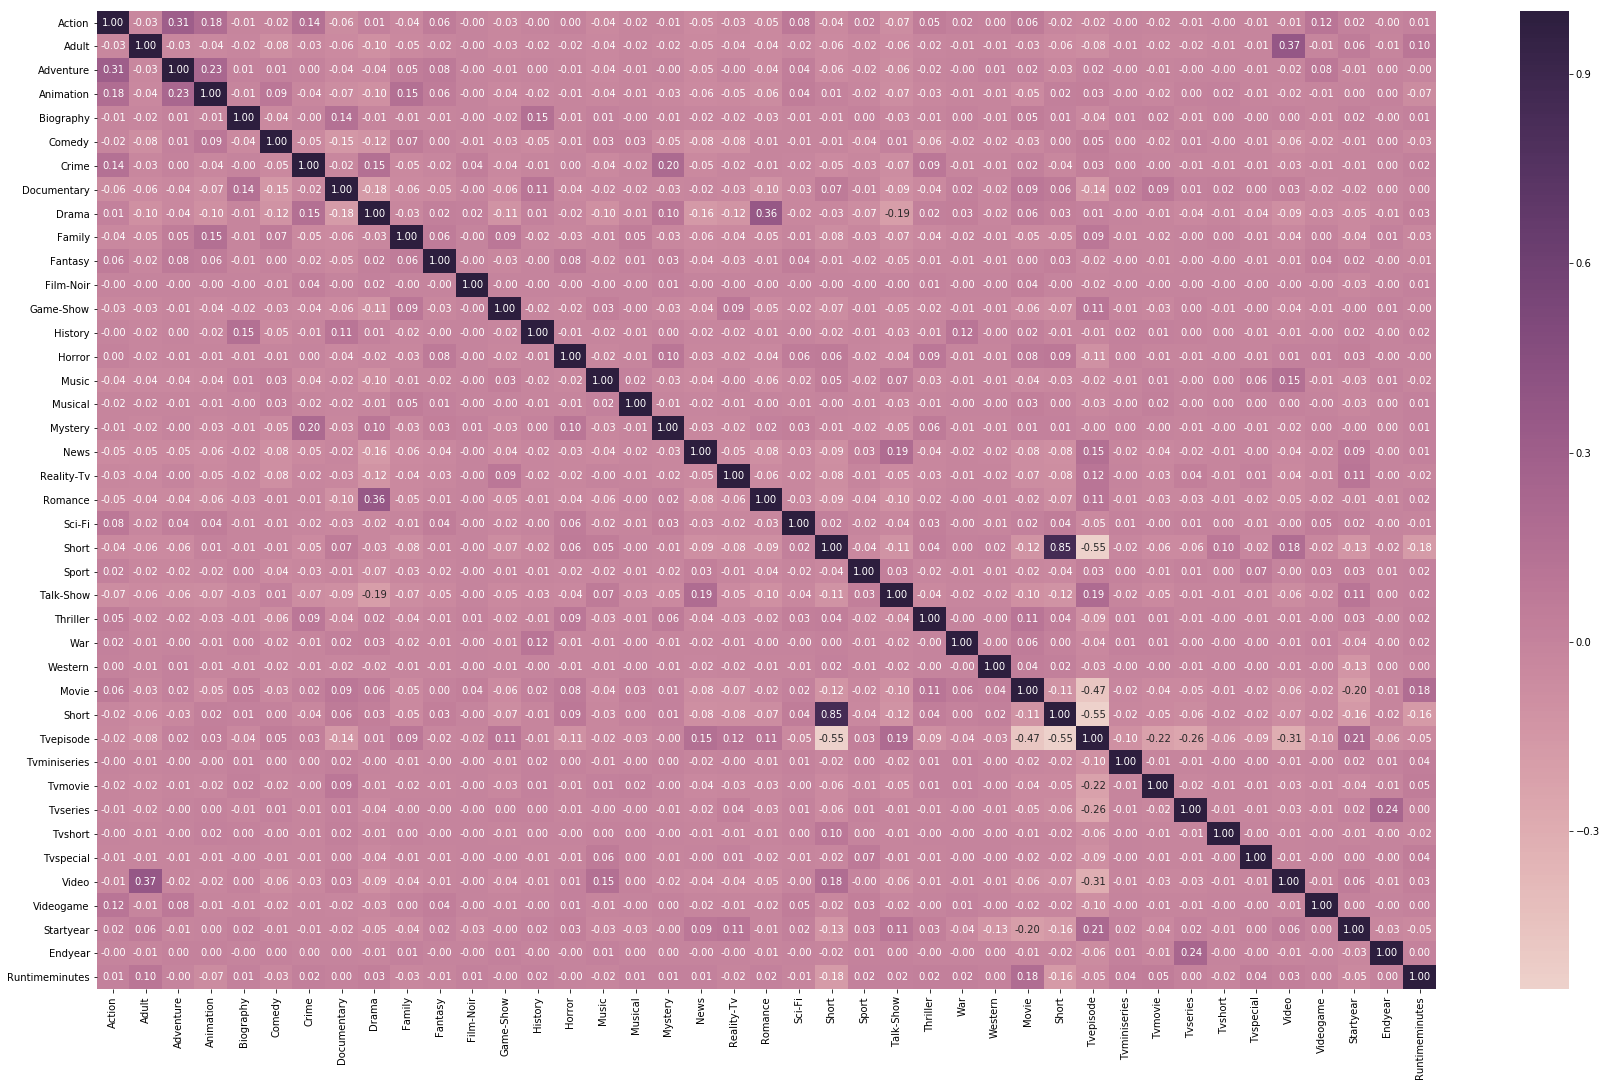

In [22]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(30,18))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax, fmt='.2f')

In [23]:
def bit_sum_32(b):
    b = ((b & 0xAAAAAAAA) >>  1) + (b & 0x55555555)
    b = ((b & 0xCCCCCCCC) >>  2) + (b & 0x33333333)
    b = ((b & 0xF0F0F0F0) >>  4) + (b & 0x0F0F0F0F)
    b = ((b & 0xFF00FF00) >>  8) + (b & 0x00FF00FF)
    b = ((b & 0xFFFF0000) >> 16) + (b & 0x0000FFFF)
    return b & 1

def add_parity(data):
    return (data << 1) | bit_sum_32(data)

def H3126_encode(data):
        return ((data & 0x3ffffff) << 5) \
             | (bit_sum_32(data & 0x3fff80) << 4) \
             | (bit_sum_32(data & 0x1c7f878) << 3) \
             | (bit_sum_32(data & 0x2d9e666) << 2) \
             | (bit_sum_32(data & 0x36ad555) << 1) \
             | bit_sum_32(data & 0x3b4b4cb)
    
def H3226_encode(data):
    return add_parity(H3126_encode(data))

In [24]:
def handleItemsList(s):
    arr = [0.] * 30
    if isinstance(s, str):
        vals = s.split(",")
        if vals:
            weight = 0.5 / len(vals)
            for v in vals:
                n = H3226_encode(int(parse("nm{}", v)[0]))
                for i in range(30):
                    arr[i] += weight if (n & (1 << i)) else 0.
    return tuple(arr)    

def makeItemsDummies(col, df, prefix):
    temp = list(zip(*col.map(handleItemsList)))
    # return pd.DataFrame.from_records(temp)
    for i in range(30):
        df[prefix + str(i)] = temp[i] 

In [25]:
!curl -O https://datasets.imdbws.com/title.crew.tsv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 13 41.2M   13 5679k    0     0  9561k      0  0:00:04 --:--:--  0:00:04 9561k
 47 41.2M   47 19.5M    0     0  12.2M      0  0:00:03  0:00:01  0:00:02 12.2M
 64 41.2M   64 26.4M    0     0  10.2M      0  0:00:04  0:00:02  0:00:02 10.2M
 79 41.2M   79 32.6M    0     0  9297k      0  0:00:04  0:00:03  0:00:01 9297k
 95 41.2M   95 39.2M    0     0  8749k      0  0:00:04  0:00:04 --:--:-- 8749k
100 41.2M  100 41.2M    0     0  8641k      0  0:00:04  0:00:04 --:--:-- 8514k


In [26]:
crew = pd.read_csv("title.crew.tsv.gz",compression='gzip', sep='\t', dtype={"directors": str,"writers": str}, na_values = '\\N')

In [27]:
makeItemsDummies(crew["directors"], crew, "d")

In [28]:
makeItemsDummies(crew["writers"], crew, "w")

In [29]:
basics["directors"] = crew["directors"]
basics["writers"] = crew["writers"]
del crew["directors"]
del crew["writers"]

In [30]:
crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5988234 entries, 0 to 5988233
Data columns (total 61 columns):
tconst    object
d0        float64
d1        float64
d2        float64
d3        float64
d4        float64
d5        float64
d6        float64
d7        float64
d8        float64
d9        float64
d10       float64
d11       float64
d12       float64
d13       float64
d14       float64
d15       float64
d16       float64
d17       float64
d18       float64
d19       float64
d20       float64
d21       float64
d22       float64
d23       float64
d24       float64
d25       float64
d26       float64
d27       float64
d28       float64
d29       float64
w0        float64
w1        float64
w2        float64
w3        float64
w4        float64
w5        float64
w6        float64
w7        float64
w8        float64
w9        float64
w10       float64
w11       float64
w12       float64
w13       float64
w14       float64
w15       float64
w16       float64
w17       float64
w18   

In [31]:
df["tconst"] = basics["tconst"]

In [32]:
df = df.join(crew.set_index("tconst"), on="tconst")

In [33]:
!curl -O https://datasets.imdbws.com/title.ratings.tsv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 59 4581k   59 2719k    0     0  6954k      0 --:--:-- --:--:-- --:--:-- 6954k
100 4581k  100 4581k    0     0  9465k      0 --:--:-- --:--:-- --:--:-- 9465k


In [34]:
ratings = pd.read_csv("title.ratings.tsv.gz",compression='gzip', sep='\t', na_values = '\\N')

In [35]:
ratings.numVotes = np.where(pd.isnull(ratings.numVotes), 0, np.log(ratings.numVotes + 1))

In [36]:
ratings = ratings.interpolate()

In [37]:
column_names_to_normalize = ['averageRating', 'numVotes']
x_scaled = min_max_scaler.fit_transform(ratings[column_names_to_normalize].values)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = ratings.index)
ratings[column_names_to_normalize] = df_temp

In [38]:
ratings.tail(10)

,tconst,averageRating,numVotes
949944,tt9916206,0.122222,0.022527
949945,tt9916316,0.822222,0.000000
949946,tt9916380,0.944444,0.214623
949947,tt9916420,0.666667,0.012071
949948,tt9916544,0.700000,0.022527
949949,tt9916576,0.600000,0.000000
949950,tt9916578,0.888889,0.047464
949951,tt9916720,0.400000,0.105222
949952,tt9916766,0.666667,0.031750
949953,tt9916778,0.911111,0.012071


In [39]:
df = df.join(ratings.set_index("tconst"), on="tconst")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986228 entries, 0 to 5986227
Columns: 104 entries, Action to numVotes
dtypes: float64(65), int64(28), object(1), uint8(10)
memory usage: 4.2+ GB


In [41]:
list(df.columns.values)

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western',
 'movie',
 'short',
 'tvEpisode',
 'tvMiniSeries',
 'tvMovie',
 'tvSeries',
 'tvShort',
 'tvSpecial',
 'video',
 'videoGame',
 'startYear',
 'endYear',
 'runtimeMinutes',
 'tconst',
 'd0',
 'd1',
 'd2',
 'd3',
 'd4',
 'd5',
 'd6',
 'd7',
 'd8',
 'd9',
 'd10',
 'd11',
 'd12',
 'd13',
 'd14',
 'd15',
 'd16',
 'd17',
 'd18',
 'd19',
 'd20',
 'd21',
 'd22',
 'd23',
 'd24',
 'd25',
 'd26',
 'd27',
 'd28',
 'd29',
 'w0',
 'w1',
 'w2',
 'w3',
 'w4',
 'w5',
 'w6',
 'w7',
 'w8',
 'w9',
 'w10',
 'w11',
 'w12',
 'w13',
 'w14',
 'w15',
 'w16',
 'w17',
 'w18',
 'w19',
 'w20',
 'w21',
 'w22',
 'w23',
 'w24',
 'w25',
 'w26',
 'w27',
 'w28',
 'w29',
 'averageRating',
 'numVot

In [42]:
del df['tconst']

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986228 entries, 0 to 5986227
Columns: 103 entries, Action to numVotes
dtypes: float64(65), int64(28), uint8(10)
memory usage: 4.2 GB


In [44]:
df = df.interpolate()

In [45]:
n_components = 55
whiten = False
random_state = 2018

In [46]:
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [47]:
X_train_PCA = pca.fit_transform(df)

In [48]:
X_train_PCA = pd.DataFrame(data=X_train_PCA)

In [49]:
X_train_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986228 entries, 0 to 5986227
Data columns (total 55 columns):
0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
dtypes: float64(55)
memory usage: 2.5 GB


In [50]:
print("Variance Explained by principal components: ", sum(pca.explained_variance_ratio_))

Variance Explained by principal components:  0.8603277779245344


In [51]:
# Percentage of Variance Captured by X principal components
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 2 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values)
print('Variance Captured by First 5 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:4].sum(axis=1).values)
print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 30 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:29].sum(axis=1).values)

Variance Captured by First 2 Principal Components:  [0.25886997]
Variance Captured by First 5 Principal Components:  [0.38565267]
Variance Captured by First 10 Principal Components:  [0.48800313]
Variance Captured by First 20 Principal Components:  [0.59575936]
Variance Captured by First 30 Principal Components:  [0.68531653]


In [52]:
kdtree = KDTree(X_train_PCA)

In [53]:
def findNearest(tconst):
    idx = basics[basics["tconst"] == tconst].index[0]
    _, ind = kdtree.query(X_train_PCA[idx:idx+1], k=51)
    return basics.iloc[ind[0][1:]]

In [54]:
findNearest("tt0120338")

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers
44470,tt0045251,movie,Othello,The Tragedy of Othello: The Moor of Venice,0,1951.0,0.0,90.0,"Drama,History,Romance",nm0000080,"nm0755068,nm0000636,nm0000080"
2408604,tt2209418,movie,Before Midnight,Before Midnight,0,2013.0,0.0,109.0,"Drama,Romance",nm1454801,NaN
366503,tt0381681,movie,Before Sunset,Before Sunset,0,2004.0,0.0,80.0,"Drama,Romance",nm0000500,"nm0000500,nm0000365,nm0000160,nm0471811"
38126,tt0038787,movie,Notorious,Notorious,0,1946.0,0.0,102.0,"Drama,Film-Noir,Romance",nm0000033,"nm0372942,nm0000033,nm0285218,nm0644048"
357499,tt0372400,movie,Magnetic Storms,Magnitnye buri,0,2003.0,0.0,93.0,"Drama,Romance",nm0008244,nm0591046
279530,tt0291519,movie,Toña machetes,Toña machetes,0,1985.0,0.0,122.0,"Drama,Romance,Thriller",nm0032853,"nm0032853,nm0126528,nm0307408,nm1085985"
110047,tt0112471,movie,Before Sunrise,Before Sunrise,0,1995.0,0.0,101.0,"Drama,Romance",nm0000500,"nm0000500,nm0471811"
22499,tt0022867,movie,Ecstasy,Ekstase,0,1933.0,0.0,82.0,"Drama,Romance",nm0532561,"nm0394750,nm0394746,nm0462949,nm0532561"
81155,tt0082910,movie,Piranha II: The Spawning,Piranha Part Two: The Spawning,0,1981.0,0.0,94.0,"Drama,Horror,Romance","nm0000116,nm0039890,nm0236973","nm0039890,nm0000116,nm0251050"
92737,tt0094783,movie,The Boost,The Boost,0,1988.0,0.0,95.0,"Drama,Romance",nm0000887,"nm0825401,nm0690431"


In [55]:
findNearest("tt0245429")

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers
78176,tt0079833,movie,Lupin III: The Castle of Cagliostro,Rupan sansei: Kariosutoro no shiro,0,1979.0,0.0,100.0,"Adventure,Animation,Family",nm0594503,"nm0700578,nm0594503,nm1500897,nm0556856,nm0495728"
445115,tt0462699,movie,Conan the Future Boy: The Big Giant Robot's Re...,Mirai shônen Konan Tokubetsu-hen: Kyodaiki Gig...,0,1984.0,0.0,49.0,"Adventure,Animation,Family",nm0594503,"nm0450720,nm1374328"
332974,tt0347149,movie,Howl's Moving Castle,Hauru no ugoku shiro,0,2004.0,0.0,119.0,"Adventure,Animation,Family",nm0594503,"nm0594503,nm1168510"
53267,tt0054265,movie,Alakazam the Great,Saiyûki,0,1960.0,0.0,88.0,"Adventure,Animation,Family","nm0944763,nm0794198,nm0856804","nm0465402,nm0470906,nm0750870,nm0847121,nm0856..."
81486,tt0083258,movie,The Fantastic Adventures of Unico,Unico,0,1981.0,0.0,90.0,"Adventure,Animation,Family","nm0856804,nm0386303","nm0856804,nm0875313"
127199,tt0130623,movie,Dinosaur,Dinosaur,0,2000.0,0.0,82.0,"Adventure,Animation,Family","nm0500343,nm0957798","nm0258059,nm0365666,nm0414608,nm0957798,nm0338..."
4644241,tt7069814,movie,Kiddo the Super-Truck,Kiddo the Super-Truck,0,2005.0,0.0,79.0,"Adventure,Animation,Family",nm0022750,NaN
92199,tt0094238,movie,Valhalla,Valhalla,0,1986.0,0.0,76.0,"Adventure,Animation,Family","nm0535237,nm0889447","nm1342594,nm0475656,nm0535237,nm1343304,nm1343..."
85665,tt0087543,movie,Katy Caterpillar,"Katy, la oruga",0,1984.0,0.0,86.0,"Adventure,Animation,Family","nm0606006,nm0606023","nm0733979,nm0401362,nm0949954"
3797452,tt5198068,movie,Wolfwalkers,Wolfwalkers,0,2020.0,0.0,NaN,"Adventure,Animation,Family",nm1422025,NaN
